# 分类模型评价

# 7个类别进行模型评价--原始词频

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.284 seconds.
Prefix dict has been built succesfully.


LR : 0.882857 (0.060317)
                 precision    recall  f1-score   support

   C19-Computer       0.97      0.99      0.98       451
         C3-Art       0.99      0.99      0.99       444
C31-Enviornment       0.98      0.96      0.97       468
C32-Agriculture       0.97      0.95      0.96       466
    C34-Economy       0.91      0.98      0.94       427
   C38-Politics       0.98      0.93      0.96       467
     C39-Sports       0.97      0.97      0.97       427

    avg / total       0.97      0.97      0.97      3150


SVM : 0.637238 (0.125171)
                 precision    recall  f1-score   support

   C19-Computer       0.95      0.94      0.95       451
         C3-Art       0.98      0.88      0.93       444
C31-Enviornment       0.60      0.96      0.73       468
C32-Agriculture       0.97      0.80      0.88       466
    C34-Economy       0.91      0.87      0.89       427
   C38-Politics       0.95      0.76      0.84       467
     C39-Sports       0.93      

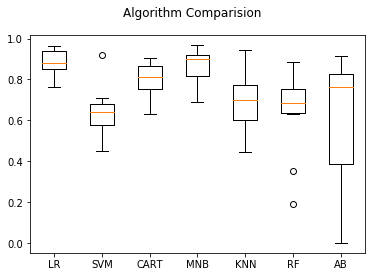

In [1]:
import pandas as pd
import os
#读入训练集的文件，形成矩阵
def list_all_files(rootdir):
    _files = []
    list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
    for i in range(0,len(list)):
        path = os.path.join(rootdir,list[i])
        if os.path.isdir(path):
            _files.extend(PdfToTxt.list_all_files(path))
        if os.path.isfile(path):
            _files.append(list[i])
    return _files

def gettxt_list(rootdir):
    all_list = list_all_files(rootdir)   
    txt_list=[]
    for onelist in all_list:
        if onelist.find('txt') != -1:
            txt_list.append(onelist[0:-4])   
        #print(txt_list)
    return txt_list

def readtxt(filename,rootdir):
    #读取一个txt文件，内容保存在str中
    f=open(rootdir+'/'+filename+'.txt','r',encoding='ANSI',errors='ignore')
    str = ''
    for line in f.readlines():
        a = line.strip('\n')
        str = str + a
        #print(str)
    return str

def getAlldata(rootdir):
    filesdata = []
    txt_lists = gettxt_list(rootdir)
        #print(txt_lists)
    for i in range(len(txt_lists)):
        filename = txt_lists[i]
        file_content = readtxt(filename,rootdir)
        listi = [filename,file_content]
        filesdata.append(listi)
        #print(data)
    return filesdata

def new_DataFrame(rootdir,catagory): 
    filesdata= getAlldata(rootdir)
    df_files = pd.DataFrame(data=filesdata,columns = ['filename','content'])
    df_files['catagory'] = catagory
    return df_files

rootdir1 = r'C:\EdmsData\data2\train_corpus\C3-Art'
xunlian_files = new_DataFrame(rootdir1,'C3-Art')

rootdir2 = r'C:\EdmsData\data2\train_corpus\C19-Computer'
xunlian_files2 = new_DataFrame(rootdir2,'C19-Computer')


rootdir3 = r'C:\EdmsData\data2\train_corpus\C31-Enviornment'
xunlian_files3 = new_DataFrame(rootdir3,'C31-Enviornment')

rootdir4 = r'C:\EdmsData\data2\train_corpus\C32-Agriculture'
xunlian_files4 = new_DataFrame(rootdir4,'C32-Agriculture')

rootdir5 = r'C:\EdmsData\data2\train_corpus\C34-Economy'
xunlian_files5 = new_DataFrame(rootdir5,'C34-Economy')

rootdir6 = r'C:\EdmsData\data2\train_corpus\C38-Politics'
xunlian_files6 = new_DataFrame(rootdir6,'C38-Politics')

rootdir7 = r'C:\EdmsData\data2\train_corpus\C39-Sports'
xunlian_files7 = new_DataFrame(rootdir7,'C39-Sports')

xunlian_files = xunlian_files.append(xunlian_files2,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files3,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files4,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files5,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files6,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files7,ignore_index=True)

xunlian_files #训练集
#print(xunlian_files.head(9800))

#----------------------------------形成训练集的数据框---------------------------

#----------------------------------形成测试集的数据框---------------------------


from sklearn.externals import joblib
#分词
import jieba

stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='UTF-8',engine='python').w)
cuttxt = lambda x : ' '.join([w for w in jieba.cut(x) if w not in stoplist and len(w) >1])

#cuttxt = lambda x : ' '.join(jieba.lcut(x))
xunlian_files['cleantxt'] = xunlian_files.content.apply(cuttxt)


#词频矩阵
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer() 
xunlian_files_catagory = []
for i in range(len(xunlian_files)):
    xunlian_files_catagory.append(xunlian_files.catagory[i])


x_train_wordmtx = countvec.fit_transform(xunlian_files.cleantxt)

#print(x_train.shape)

import numpy as np
y_train0 = np.array(xunlian_files_catagory)


# 作用：将数据集划分为 训练集和测试集
from sklearn.model_selection import train_test_split
#raw12ana.chap 要预测的变量值
x_train, x_test, y_train, y_test = train_test_split(x_train_wordmtx, y_train0, test_size = 0.3, random_state = 7)


#----------------------------------拟合模型--------------------------

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

#设置评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'
#生成算法模型
models = {}
models['LR'] = LogisticRegression()
models['SVM'] = SVC()
models['CART'] =DecisionTreeClassifier()
models['MNB'] = MultinomialNB()
models['KNN'] = KNeighborsClassifier()
models['RF'] = RandomForestClassifier()
models['AB'] = AdaBoostClassifier()
from sklearn.metrics import classification_report
results = []
for key in models:  
    kfold = KFold(n_splits = num_folds,random_state = seed)
    cv_results = cross_val_score(models[key],x_train_wordmtx,y_train0,cv = kfold,scoring = scoring)
    results.append(cv_results)
    print('%s : %f (%f)' %(key,cv_results.mean(),cv_results.std()))
    
    lmodel = models[key].fit(x_train, y_train)
    print(classification_report(y_test, lmodel.predict(x_test)))
    print()
#箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

# 7类模型具体分析---tfidf

LR : 0.862286 (0.080261)
                 precision    recall  f1-score   support

   C19-Computer       0.96      1.00      0.98       451
         C3-Art       0.99      1.00      0.99       444
C31-Enviornment       0.95      0.96      0.96       468
C32-Agriculture       0.96      0.93      0.95       466
    C34-Economy       0.93      0.95      0.94       427
   C38-Politics       0.96      0.93      0.95       467
     C39-Sports       0.97      0.95      0.96       427

    avg / total       0.96      0.96      0.96      3150


SVM : 0.000000 (0.000000)


C:\Tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

   C19-Computer       0.00      0.00      0.00       451
         C3-Art       0.00      0.00      0.00       444
C31-Enviornment       0.00      0.00      0.00       468
C32-Agriculture       0.00      0.00      0.00       466
    C34-Economy       0.35      0.98      0.52       427
   C38-Politics       0.00      0.00      0.00       467
     C39-Sports       0.21      0.98      0.35       427

    avg / total       0.08      0.27      0.12      3150


CART : 0.806667 (0.091717)
                 precision    recall  f1-score   support

   C19-Computer       0.98      0.98      0.98       451
         C3-Art       0.97      0.98      0.97       444
C31-Enviornment       0.99      0.99      0.99       468
C32-Agriculture       0.98      0.96      0.97       466
    C34-Economy       0.92      0.93      0.93       427
   C38-Politics       0.93      0.93      0.93       467
     C39-Sports       0.95      0.94      0.95       427

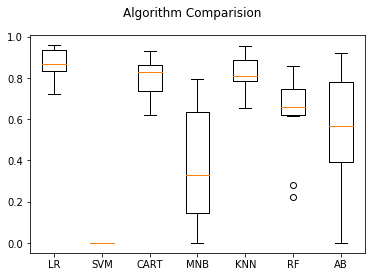

In [ ]:
import pandas as pd
import os
#读入训练集的文件，形成矩阵
def list_all_files(rootdir):
    _files = []
    list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
    for i in range(0,len(list)):
        path = os.path.join(rootdir,list[i])
        if os.path.isdir(path):
            _files.extend(PdfToTxt.list_all_files(path))
        if os.path.isfile(path):
            _files.append(list[i])
    return _files

def gettxt_list(rootdir):
    all_list = list_all_files(rootdir)   
    txt_list=[]
    for onelist in all_list:
        if onelist.find('txt') != -1:
            txt_list.append(onelist[0:-4])   
        #print(txt_list)
    return txt_list

def readtxt(filename,rootdir):
    #读取一个txt文件，内容保存在str中
    f=open(rootdir+'/'+filename+'.txt','r',encoding='ANSI',errors='ignore')
    str = ''
    for line in f.readlines():
        a = line.strip('\n')
        str = str + a
        #print(str)
    return str

def getAlldata(rootdir):
    filesdata = []
    txt_lists = gettxt_list(rootdir)
        #print(txt_lists)
    for i in range(len(txt_lists)):
        filename = txt_lists[i]
        file_content = readtxt(filename,rootdir)
        listi = [filename,file_content]
        filesdata.append(listi)
        #print(data)
    return filesdata

def new_DataFrame(rootdir,catagory): 
    filesdata= getAlldata(rootdir)
    df_files = pd.DataFrame(data=filesdata,columns = ['filename','content'])
    df_files['catagory'] = catagory
    return df_files

rootdir1 = r'C:\EdmsData\data2\train_corpus\C3-Art'
xunlian_files = new_DataFrame(rootdir1,'C3-Art')

rootdir2 = r'C:\EdmsData\data2\train_corpus\C19-Computer'
xunlian_files2 = new_DataFrame(rootdir2,'C19-Computer')


rootdir3 = r'C:\EdmsData\data2\train_corpus\C31-Enviornment'
xunlian_files3 = new_DataFrame(rootdir3,'C31-Enviornment')

rootdir4 = r'C:\EdmsData\data2\train_corpus\C32-Agriculture'
xunlian_files4 = new_DataFrame(rootdir4,'C32-Agriculture')

rootdir5 = r'C:\EdmsData\data2\train_corpus\C34-Economy'
xunlian_files5 = new_DataFrame(rootdir5,'C34-Economy')

rootdir6 = r'C:\EdmsData\data2\train_corpus\C38-Politics'
xunlian_files6 = new_DataFrame(rootdir6,'C38-Politics')

rootdir7 = r'C:\EdmsData\data2\train_corpus\C39-Sports'
xunlian_files7 = new_DataFrame(rootdir7,'C39-Sports')

xunlian_files = xunlian_files.append(xunlian_files2,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files3,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files4,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files5,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files6,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files7,ignore_index=True)

#xunlian_files #训练集
#print(xunlian_files.head(9800))

#----------------------------------形成训练集的数据框---------------------------

#----------------------------------形成测试集的数据框---------------------------


from sklearn.externals import joblib
#分词
import jieba

stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='UTF-8',engine='python').w)
cuttxt = lambda x : ' '.join([w for w in jieba.cut(x) if w not in stoplist and len(w) >1])

#cuttxt = lambda x : ' '.join(jieba.lcut(x))
xunlian_files['cleantxt'] = xunlian_files.content.apply(cuttxt)


#词频矩阵
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer() 
xunlian_files_catagory = []
for i in range(len(xunlian_files)):
    xunlian_files_catagory.append(xunlian_files.catagory[i])


x_train_wordmtx = countvec.fit_transform(xunlian_files.cleantxt)
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()  
x_train_tfidf = transformer.fit_transform(x_train_wordmtx)

#print(x_train.shape)

import numpy as np
y_train0 = np.array(xunlian_files_catagory)


# 作用：将数据集划分为 训练集和测试集
from sklearn.model_selection import train_test_split
#raw12ana.chap 要预测的变量值
x_train, x_test, y_train, y_test = train_test_split(x_train_tfidf, y_train0, test_size = 0.3, random_state = 7)


#----------------------------------拟合模型--------------------------

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

#设置评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'
#生成算法模型
models = {}
models['LR'] = LogisticRegression()
models['SVM'] = SVC()
models['CART'] =DecisionTreeClassifier()
models['MNB'] = MultinomialNB()
models['KNN'] = KNeighborsClassifier()
models['RF'] = RandomForestClassifier()
models['AB'] = AdaBoostClassifier()
from sklearn.metrics import classification_report
results = []
for key in models:  
    kfold = KFold(n_splits = num_folds,random_state = seed)
    cv_results = cross_val_score(models[key],x_train_tfidf,y_train0,cv = kfold,scoring = scoring)
    results.append(cv_results)
    print('%s : %f (%f)' %(key,cv_results.mean(),cv_results.std()))
    
    lmodel = models[key].fit(x_train, y_train)
    print(classification_report(y_test, lmodel.predict(x_test)))
    print()
#箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

# 20类模型具体分析--原始词频

(9804, 373529)
(9804,)
<class 'numpy.ndarray'>
(9804, 373529)
LR : 0.572901 (0.270075)
                   precision    recall  f1-score   support

        C11-Space       0.96      0.92      0.94       642
       C15-Energy       1.00      0.52      0.68        33
  C16-Electronics       0.83      0.54      0.65        28
C17-Communication       0.78      0.78      0.78        27
     C19-Computer       0.96      0.99      0.97      1358
         C23-Mine       0.86      0.71      0.77        34
    C29-Transport       0.81      0.73      0.77        59
           C3-Art       0.89      0.95      0.92       713
  C31-Enviornment       0.97      0.97      0.97      1218
  C32-Agriculture       0.93      0.94      0.93      1022
      C34-Economy       0.91      0.94      0.92      1601
          C35-Law       0.71      0.65      0.68        52
      C36-Medical       0.92      0.64      0.76        53
     C37-Military       0.74      0.68      0.71        76
     C38-Politics       0.8

C:\Tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

        C11-Space       0.97      0.30      0.46       642
       C15-Energy       0.00      0.00      0.00        33
  C16-Electronics       0.00      0.00      0.00        28
C17-Communication       0.00      0.00      0.00        27
     C19-Computer       0.85      0.89      0.87      1358
         C23-Mine       0.00      0.00      0.00        34
    C29-Transport       0.00      0.00      0.00        59
           C3-Art       0.87      0.74      0.80       713
  C31-Enviornment       0.79      0.82      0.80      1218
  C32-Agriculture       0.93      0.65      0.77      1022
      C34-Economy       0.91      0.82      0.86      1601
          C35-Law       0.00      0.00      0.00        52
      C36-Medical       0.00      0.00      0.00        53
     C37-Military       0.00      0.00      0.00        76
     C38-Politics       0.87      0.55      0.67      1026
       C39-Sports       0.37      0.95      0.53      1

C:\Tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

        C11-Space       0.94      0.84      0.89       642
       C15-Energy       1.00      0.03      0.06        33
  C16-Electronics       0.00      0.00      0.00        28
C17-Communication       1.00      0.04      0.07        27
     C19-Computer       0.94      0.96      0.95      1358
         C23-Mine       0.00      0.00      0.00        34
    C29-Transport       1.00      0.02      0.03        59
           C3-Art       0.80      0.96      0.87       713
  C31-Enviornment       0.94      0.90      0.92      1218
  C32-Agriculture       0.87      0.89      0.88      1022
      C34-Economy       0.83      0.92      0.87      1601
          C35-Law       1.00      0.02      0.04        52
      C36-Medical       0.00      0.00      0.00        53
     C37-Military       1.00      0.03      0.05        76
     C38-Politics       0.80      0.94      0.86      1026
       C39-Sports       0.86      0.94      0.90      1

C:\Tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

        C11-Space       0.14      0.00      0.00       642
       C15-Energy       0.51      0.55      0.53        33
  C16-Electronics       0.00      0.00      0.00        28
C17-Communication       0.31      0.74      0.43        27
     C19-Computer       0.43      0.95      0.59      1358
         C23-Mine       0.80      0.47      0.59        34
    C29-Transport       0.00      0.00      0.00        59
           C3-Art       0.13      0.02      0.03       713
  C31-Enviornment       0.55      0.29      0.38      1218
  C32-Agriculture       0.17      0.02      0.04      1022
      C34-Economy       0.39      0.81      0.53      1601
          C35-Law       0.00      0.00      0.00        52
      C36-Medical       0.12      0.04      0.06        53
     C37-Military       0.00      0.00      0.00        76
     C38-Politics       0.25      0.30      0.27      1026
       C39-Sports       0.92      0.51      0.66      1

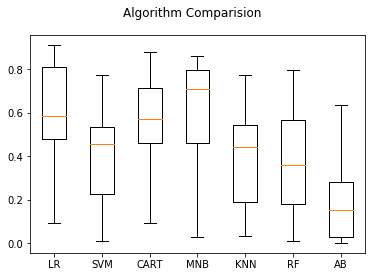

In [ ]:
#1.生成d2m矩阵
import pandas as pd
import os
#读入训练集的文件，形成矩阵
def list_all_files(rootdir):
    _files = []
    list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
    for i in range(0,len(list)):
        path = os.path.join(rootdir,list[i])
        if os.path.isdir(path):
            _files.extend(PdfToTxt.list_all_files(path))
        if os.path.isfile(path):
            _files.append(list[i])
    return _files

def gettxt_list(rootdir):
    all_list = list_all_files(rootdir)   
    txt_list=[]
    for onelist in all_list:
        if onelist.find('txt') != -1:
            txt_list.append(onelist[0:-4])   
        #print(txt_list)
    return txt_list

def readtxt(filename,rootdir):
    #读取一个txt文件，内容保存在str中
    f=open(rootdir+'/'+filename+'.txt','r',encoding='ANSI',errors='ignore')
    str = ''
    for line in f.readlines():
        a = line.strip('\n')
        str = str + a
        #print(str)
    return str

def getAlldata(rootdir):
    filesdata = []
    txt_lists = gettxt_list(rootdir)
        #print(txt_lists)
    for i in range(len(txt_lists)):
        filename = txt_lists[i]
        file_content = readtxt(filename,rootdir)
        listi = [filename,file_content]
        filesdata.append(listi)
        #print(data)
    return filesdata

def new_DataFrame(rootdir,catagory): 
    filesdata= getAlldata(rootdir)
    df_files = pd.DataFrame(data=filesdata,columns = ['filename','content'])
    df_files['catagory'] = catagory
    return df_files

rootdir1 = r'C:\EdmsData\data\train_corpus\C3-Art'
xunlian_files = new_DataFrame(rootdir1,'C3-Art')

rootdir2 = r'C:\EdmsData\data\train_corpus\C4-Literature'
xunlian_files2 = new_DataFrame(rootdir2,'C4-Literature')

rootdir3 = r'C:\EdmsData\data\train_corpus\C5-Education'
xunlian_files3 = new_DataFrame(rootdir3,'C5-Education')

rootdir4 = r'C:\EdmsData\data\train_corpus\C6-Philosophy'
xunlian_files4 = new_DataFrame(rootdir4,'C6-Philosophy')

rootdir5 = r'C:\EdmsData\data\train_corpus\C7-History'
xunlian_files5 = new_DataFrame(rootdir5,'C7-History')

rootdir6 = r'C:\EdmsData\data\train_corpus\C11-Space'
xunlian_files6 = new_DataFrame(rootdir6,'C11-Space')

rootdir7 = r'C:\EdmsData\data\train_corpus\C15-Energy'
xunlian_files7 = new_DataFrame(rootdir7,'C15-Energy')

rootdir8 = r'C:\EdmsData\data\train_corpus\C16-Electronics'
xunlian_files8 = new_DataFrame(rootdir8,'C16-Electronics')

rootdir9 = r'C:\EdmsData\data\train_corpus\C17-Communication'
xunlian_files9 = new_DataFrame(rootdir9,'C17-Communication')

rootdir10 = r'C:\EdmsData\data\train_corpus\C19-Computer'
xunlian_files10 = new_DataFrame(rootdir10,'C19-Computer')

rootdir11 = r'C:\EdmsData\data\train_corpus\C23-Mine'
xunlian_files11 = new_DataFrame(rootdir11,'C23-Mine')

rootdir12 = r'C:\EdmsData\data\train_corpus\C29-Transport'
xunlian_files12 = new_DataFrame(rootdir12,'C29-Transport')

rootdir13 = r'C:\EdmsData\data\train_corpus\C31-Enviornment'
xunlian_files13 = new_DataFrame(rootdir13,'C31-Enviornment')

rootdir14 = r'C:\EdmsData\data\train_corpus\C32-Agriculture'
xunlian_files14 = new_DataFrame(rootdir14,'C32-Agriculture')

rootdir15 = r'C:\EdmsData\data\train_corpus\C34-Economy'
xunlian_files15 = new_DataFrame(rootdir15,'C34-Economy')

rootdir16 = r'C:\EdmsData\data\train_corpus\C35-Law'
xunlian_files16 = new_DataFrame(rootdir16,'C35-Law')

rootdir17 = r'C:\EdmsData\data\train_corpus\C36-Medical'
xunlian_files17 = new_DataFrame(rootdir17,'C36-Medical')

rootdir18 = r'C:\EdmsData\data\train_corpus\C37-Military'
xunlian_files18 = new_DataFrame(rootdir18,'C37-Military')

rootdir19 = r'C:\EdmsData\data\train_corpus\C38-Politics'
xunlian_files19 = new_DataFrame(rootdir19,'C38-Politics')

rootdir20 = r'C:\EdmsData\data\train_corpus\C39-Sports'
xunlian_files20 = new_DataFrame(rootdir20,'C39-Sports')

xunlian_files = xunlian_files.append(xunlian_files2,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files3,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files4,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files5,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files6,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files7,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files8,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files9,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files10,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files11,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files12,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files13,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files14,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files15,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files16,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files17,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files18,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files19,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files20,ignore_index=True)

xunlian_files #训练集
#print(xunlian_files.head(9800))

#----------------------------------形成训练集的数据框---------------------------

rootdir21 = r'C:\EdmsData\data\test_corpus\C3-Art'
ceshi_files = new_DataFrame(rootdir21,'C3-Art')

rootdir22 = r'C:\EdmsData\data\test_corpus\C4-Literature'
ceshi_files2 = new_DataFrame(rootdir22,'C4-Literature')

rootdir23 = r'C:\EdmsData\data\test_corpus\C5-Education'
ceshi_files3 = new_DataFrame(rootdir23,'C5-Education')

rootdir24 = r'C:\EdmsData\data\test_corpus\C6-Philosophy'
ceshi_files4 = new_DataFrame(rootdir24,'C6-Philosophy')

rootdir25 = r'C:\EdmsData\data\test_corpus\C7-History'
ceshi_files5 = new_DataFrame(rootdir25,'C7-History')

rootdir26 = r'C:\EdmsData\data\test_corpus\C11-Space'
ceshi_files6 = new_DataFrame(rootdir26,'C11-Space')

rootdir27 = r'C:\EdmsData\data\test_corpus\C15-Energy'
ceshi_files7 = new_DataFrame(rootdir27,'C15-Energy')

rootdir28 = r'C:\EdmsData\data\test_corpus\C16-Electronics'
ceshi_files8 = new_DataFrame(rootdir28,'C16-Electronics')

rootdir29 = r'C:\EdmsData\data\test_corpus\C17-Communication'
ceshi_files9 = new_DataFrame(rootdir29,'C17-Communication')

rootdir30 = r'C:\EdmsData\data\test_corpus\C19-Computer'
ceshi_files10 = new_DataFrame(rootdir30,'C19-Computer')

rootdir31 = r'C:\EdmsData\data\test_corpus\C23-Mine'
ceshi_files11 = new_DataFrame(rootdir31,'C23-Mine')

rootdir32 = r'C:\EdmsData\data\test_corpus\C29-Transport'
ceshi_files12 = new_DataFrame(rootdir32,'C29-Transport')

rootdir33 = r'C:\EdmsData\data\test_corpus\C31-Enviornment'
ceshi_files13 = new_DataFrame(rootdir33,'C31-Enviornment')

rootdir34 = r'C:\EdmsData\data\test_corpus\C32-Agriculture'
ceshi_files14 = new_DataFrame(rootdir34,'C32-Agriculture')

rootdir35 = r'C:\EdmsData\data\test_corpus\C34-Economy'
ceshi_files15 = new_DataFrame(rootdir35,'C34-Economy')

rootdir36 = r'C:\EdmsData\data\test_corpus\C35-Law'
ceshi_files16 = new_DataFrame(rootdir36,'C35-Law')

rootdir37 = r'C:\EdmsData\data\test_corpus\C36-Medical'
ceshi_files17 = new_DataFrame(rootdir37,'C36-Medical')

rootdir38 = r'C:\EdmsData\data\test_corpus\C37-Military'
ceshi_files18 = new_DataFrame(rootdir38,'C37-Military')

rootdir39 = r'C:\EdmsData\data\test_corpus\C38-Politics'
ceshi_files19 = new_DataFrame(rootdir39,'C38-Politics')

rootdir40 = r'C:\EdmsData\data\test_corpus\C39-Sports'
ceshi_files20 = new_DataFrame(rootdir40,'C39-Sports')

ceshi_files = ceshi_files.append(ceshi_files2,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files3,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files4,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files5,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files6,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files7,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files8,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files9,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files10,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files11,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files12,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files13,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files14,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files15,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files16,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files17,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files18,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files19,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files20,ignore_index=True)

ceshi_files
#xunlian_files.catagory.to_csv(r'C:\EdmsData\xunlian_files.txt',sep='\t', index=False)
#ceshi_files.catagory.to_csv(r'C:\EdmsData\ceshi_files.txt',sep='\t', index=False)
#----------------------------------形成测试集的数据框---------------------------


from sklearn.externals import joblib
#分词
import jieba
cuttxt = lambda x : ' '.join(jieba.lcut(x))
xunlian_files['cleantxt'] = xunlian_files.content.apply(cuttxt)
ceshi_files['cleantxt'] = ceshi_files.content.apply(cuttxt)

#词频矩阵
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer() 

xunlian_files_catagory = []
for i in range(len(xunlian_files)):
    xunlian_files_catagory.append(xunlian_files.catagory[i])
ceshi_files_catagory = []
for i in range(len(ceshi_files)):
    ceshi_files_catagory.append(ceshi_files.catagory[i])


x_train = countvec.fit_transform(xunlian_files.cleantxt)
print(x_train.shape)

import numpy as np
y_train = np.array(xunlian_files_catagory)

print(y_train.shape)
print(type(y_train))
x_test = countvec.transform(ceshi_files.cleantxt)
print(x_test.shape)
y_test = np.array(ceshi_files_catagory)

#----------------------------------拟合模型--------------------------

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

#设置评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'
#生成算法模型
models = {}
models['LR'] = LogisticRegression()
models['SVM'] = SVC()
models['CART'] =DecisionTreeClassifier()
models['MNB'] = MultinomialNB()
models['KNN'] = KNeighborsClassifier()
models['RF'] = RandomForestClassifier()
models['AB'] = AdaBoostClassifier()
from sklearn.metrics import classification_report
results = []
for key in models:  
    kfold = KFold(n_splits = num_folds,random_state = seed)
    cv_results = cross_val_score(models[key],x_train,y_train,cv = kfold,scoring = scoring)
    results.append(cv_results)
    print('%s : %f (%f)' %(key,cv_results.mean(),cv_results.std()))
    
    lmodel = models[key].fit(x_train, y_train)
    print(classification_report(y_test, lmodel.predict(x_test)))
    print()
#箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

# 20类模型评价--tfidf

In [ ]:
import pandas as pd
import os
#读入训练集的文件，形成矩阵
def list_all_files(rootdir):
    _files = []
    list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
    for i in range(0,len(list)):
        path = os.path.join(rootdir,list[i])
        if os.path.isdir(path):
            _files.extend(PdfToTxt.list_all_files(path))
        if os.path.isfile(path):
            _files.append(list[i])
    return _files

def gettxt_list(rootdir):
    all_list = list_all_files(rootdir)   
    txt_list=[]
    for onelist in all_list:
        if onelist.find('txt') != -1:
            txt_list.append(onelist[0:-4])   
        #print(txt_list)
    return txt_list

def readtxt(filename,rootdir):
    #读取一个txt文件，内容保存在str中
    f=open(rootdir+'/'+filename+'.txt','r',encoding='ANSI',errors='ignore')
    str = ''
    for line in f.readlines():
        a = line.strip('\n')
        str = str + a
        #print(str)
    return str

def getAlldata(rootdir):
    filesdata = []
    txt_lists = gettxt_list(rootdir)
        #print(txt_lists)
    for i in range(len(txt_lists)):
        filename = txt_lists[i]
        file_content = readtxt(filename,rootdir)
        listi = [filename,file_content]
        filesdata.append(listi)
        #print(data)
    return filesdata

def new_DataFrame(rootdir,catagory): 
    filesdata= getAlldata(rootdir)
    df_files = pd.DataFrame(data=filesdata,columns = ['filename','content'])
    df_files['catagory'] = catagory
    return df_files

rootdir1 = r'C:\EdmsData\data\train_corpus\C3-Art'
xunlian_files = new_DataFrame(rootdir1,'C3-Art')

rootdir2 = r'C:\EdmsData\data\train_corpus\C4-Literature'
xunlian_files2 = new_DataFrame(rootdir2,'C4-Literature')

rootdir3 = r'C:\EdmsData\data\train_corpus\C5-Education'
xunlian_files3 = new_DataFrame(rootdir3,'C5-Education')

rootdir4 = r'C:\EdmsData\data\train_corpus\C6-Philosophy'
xunlian_files4 = new_DataFrame(rootdir4,'C6-Philosophy')

rootdir5 = r'C:\EdmsData\data\train_corpus\C7-History'
xunlian_files5 = new_DataFrame(rootdir5,'C7-History')

rootdir6 = r'C:\EdmsData\data\train_corpus\C11-Space'
xunlian_files6 = new_DataFrame(rootdir6,'C11-Space')

rootdir7 = r'C:\EdmsData\data\train_corpus\C15-Energy'
xunlian_files7 = new_DataFrame(rootdir7,'C15-Energy')

rootdir8 = r'C:\EdmsData\data\train_corpus\C16-Electronics'
xunlian_files8 = new_DataFrame(rootdir8,'C16-Electronics')

rootdir9 = r'C:\EdmsData\data\train_corpus\C17-Communication'
xunlian_files9 = new_DataFrame(rootdir9,'C17-Communication')

rootdir10 = r'C:\EdmsData\data\train_corpus\C19-Computer'
xunlian_files10 = new_DataFrame(rootdir10,'C19-Computer')

rootdir11 = r'C:\EdmsData\data\train_corpus\C23-Mine'
xunlian_files11 = new_DataFrame(rootdir11,'C23-Mine')

rootdir12 = r'C:\EdmsData\data\train_corpus\C29-Transport'
xunlian_files12 = new_DataFrame(rootdir12,'C29-Transport')

rootdir13 = r'C:\EdmsData\data\train_corpus\C31-Enviornment'
xunlian_files13 = new_DataFrame(rootdir13,'C31-Enviornment')

rootdir14 = r'C:\EdmsData\data\train_corpus\C32-Agriculture'
xunlian_files14 = new_DataFrame(rootdir14,'C32-Agriculture')

rootdir15 = r'C:\EdmsData\data\train_corpus\C34-Economy'
xunlian_files15 = new_DataFrame(rootdir15,'C34-Economy')

rootdir16 = r'C:\EdmsData\data\train_corpus\C35-Law'
xunlian_files16 = new_DataFrame(rootdir16,'C35-Law')

rootdir17 = r'C:\EdmsData\data\train_corpus\C36-Medical'
xunlian_files17 = new_DataFrame(rootdir17,'C36-Medical')

rootdir18 = r'C:\EdmsData\data\train_corpus\C37-Military'
xunlian_files18 = new_DataFrame(rootdir18,'C37-Military')

rootdir19 = r'C:\EdmsData\data\train_corpus\C38-Politics'
xunlian_files19 = new_DataFrame(rootdir19,'C38-Politics')

rootdir20 = r'C:\EdmsData\data\train_corpus\C39-Sports'
xunlian_files20 = new_DataFrame(rootdir20,'C39-Sports')

xunlian_files = xunlian_files.append(xunlian_files2,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files3,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files4,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files5,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files6,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files7,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files8,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files9,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files10,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files11,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files12,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files13,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files14,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files15,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files16,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files17,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files18,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files19,ignore_index=True)
xunlian_files = xunlian_files.append(xunlian_files20,ignore_index=True)

xunlian_files #训练集
print(xunlian_files.head(9800))

#----------------------------------形成训练集的数据框---------------------------

rootdir21 = r'C:\EdmsData\data\test_corpus\C3-Art'
ceshi_files = new_DataFrame(rootdir21,'C3-Art')

rootdir22 = r'C:\EdmsData\data\test_corpus\C4-Literature'
ceshi_files2 = new_DataFrame(rootdir22,'C4-Literature')

rootdir23 = r'C:\EdmsData\data\test_corpus\C5-Education'
ceshi_files3 = new_DataFrame(rootdir23,'C5-Education')

rootdir24 = r'C:\EdmsData\data\test_corpus\C6-Philosophy'
ceshi_files4 = new_DataFrame(rootdir24,'C6-Philosophy')

rootdir25 = r'C:\EdmsData\data\test_corpus\C7-History'
ceshi_files5 = new_DataFrame(rootdir25,'C7-History')

rootdir26 = r'C:\EdmsData\data\test_corpus\C11-Space'
ceshi_files6 = new_DataFrame(rootdir26,'C11-Space')

rootdir27 = r'C:\EdmsData\data\test_corpus\C15-Energy'
ceshi_files7 = new_DataFrame(rootdir27,'C15-Energy')

rootdir28 = r'C:\EdmsData\data\test_corpus\C16-Electronics'
ceshi_files8 = new_DataFrame(rootdir28,'C16-Electronics')

rootdir29 = r'C:\EdmsData\data\test_corpus\C17-Communication'
ceshi_files9 = new_DataFrame(rootdir29,'C17-Communication')

rootdir30 = r'C:\EdmsData\data\test_corpus\C19-Computer'
ceshi_files10 = new_DataFrame(rootdir30,'C19-Computer')

rootdir31 = r'C:\EdmsData\data\test_corpus\C23-Mine'
ceshi_files11 = new_DataFrame(rootdir31,'C23-Mine')

rootdir32 = r'C:\EdmsData\data\test_corpus\C29-Transport'
ceshi_files12 = new_DataFrame(rootdir32,'C29-Transport')

rootdir33 = r'C:\EdmsData\data\test_corpus\C31-Enviornment'
ceshi_files13 = new_DataFrame(rootdir33,'C31-Enviornment')

rootdir34 = r'C:\EdmsData\data\test_corpus\C32-Agriculture'
ceshi_files14 = new_DataFrame(rootdir34,'C32-Agriculture')

rootdir35 = r'C:\EdmsData\data\test_corpus\C34-Economy'
ceshi_files15 = new_DataFrame(rootdir35,'C34-Economy')

rootdir36 = r'C:\EdmsData\data\test_corpus\C35-Law'
ceshi_files16 = new_DataFrame(rootdir36,'C35-Law')

rootdir37 = r'C:\EdmsData\data\test_corpus\C36-Medical'
ceshi_files17 = new_DataFrame(rootdir37,'C36-Medical')

rootdir38 = r'C:\EdmsData\data\test_corpus\C37-Military'
ceshi_files18 = new_DataFrame(rootdir38,'C37-Military')

rootdir39 = r'C:\EdmsData\data\test_corpus\C38-Politics'
ceshi_files19 = new_DataFrame(rootdir39,'C38-Politics')

rootdir40 = r'C:\EdmsData\data\test_corpus\C39-Sports'
ceshi_files20 = new_DataFrame(rootdir40,'C39-Sports')

ceshi_files = ceshi_files.append(ceshi_files2,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files3,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files4,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files5,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files6,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files7,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files8,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files9,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files10,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files11,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files12,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files13,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files14,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files15,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files16,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files17,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files18,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files19,ignore_index=True)
ceshi_files = ceshi_files.append(ceshi_files20,ignore_index=True)

ceshi_files
#xunlian_files.catagory.to_csv(r'C:\EdmsData\xunlian_files.txt',sep='\t', index=False)
#ceshi_files.catagory.to_csv(r'C:\EdmsData\ceshi_files.txt',sep='\t', index=False)
#----------------------------------形成测试集的数据框---------------------------


from sklearn.externals import joblib
#分词
import jieba

stoplist = list(pd.read_csv('C:/TMdata/stopwords.txt',names=['w'],sep='aaa',encoding='UTF-8',engine='python').w)
cuttxt = lambda x : ' '.join([w for w in jieba.cut(x) if w not in stoplist and len(w) >1])

#cuttxt = lambda x : ' '.join(jieba.lcut(x))
xunlian_files['cleantxt'] = xunlian_files.content.apply(cuttxt)
ceshi_files['cleantxt'] = ceshi_files.content.apply(cuttxt)

#词频矩阵
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer() 
xunlian_files_catagory = []
for i in range(len(xunlian_files)):
    xunlian_files_catagory.append(xunlian_files.catagory[i])
ceshi_files_catagory = []
for i in range(len(ceshi_files)):
    ceshi_files_catagory.append(ceshi_files.catagory[i])


x_train_wordmtx = countvec.fit_transform(xunlian_files.cleantxt)
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()  
x_train_tfidf = transformer.fit_transform(x_train_wordmtx)

#print(x_train.shape)

import numpy as np
y_train = np.array(xunlian_files_catagory)

#print(y_train.shape)
#print(type(y_train))
x_test_wordmtx = countvec.transform(ceshi_files.cleantxt)
x_test_tfidf = transformer.transform(x_test_wordmtx)
#print(x_test.shape)
y_test = np.array(ceshi_files_catagory)

#----------------------------------拟合模型--------------------------

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

#设置评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'
#生成算法模型
models = {}
models['LR'] = LogisticRegression()
models['SVM'] = SVC()
models['CART'] =DecisionTreeClassifier()
models['MNB'] = MultinomialNB()
models['KNN'] = KNeighborsClassifier()
models['RF'] = RandomForestClassifier()
models['AB'] = AdaBoostClassifier()
from sklearn.metrics import classification_report
results = []
for key in models:  
    kfold = KFold(n_splits = num_folds,random_state = seed)
    cv_results = cross_val_score(models[key],x_train_tfidf,y_train,cv = kfold,scoring = scoring)
    results.append(cv_results)
    print('%s : %f (%f)' %(key,cv_results.mean(),cv_results.std()))
    
    lmodel = models[key].fit(x_train_tfidf, y_train)
    print(classification_report(y_test, lmodel.predict(x_test_tfidf)))
    print()


            filename                                            content  \
0         C3-Art0001  【 文献号 】1-2340【原文出处】中国图书评论【原刊地名】沈阳【原刊期号】199510【...   
1         C3-Art0004  【 文献号 】1-2681【原文出处】武汉大学学报：哲社版【原刊期号】199605【原刊页号...   
2         C3-Art0006  【 文献号 】2-4116【原文出处】云南学术探索【原刊地名】昆明【原刊期号】199706【...   
3         C3-Art0008  【 文献号 】1-3036【原文出处】文艺理论研究【原刊地名】沪【原刊期号】199504【原...   
4         C3-Art0010  【 文献号 】1-3066【原文出处】文学评论【原刊地名】京【原刊期号】199506【原刊页...   
5         C3-Art0012  【 文献号 】1-3084【原文出处】文艺争鸣【原刊地名】长春【原刊期号】199602【原刊...   
6         C3-Art0014  【 文献号 】1-3097【原文出处】文艺研究【原刊地名】京【原刊期号】199602【原刊页...   
7         C3-Art0016  【 文献号 】1-3102【原文出处】文艺报【原刊地名】京【原刊期号】19960426【原刊...   
8         C3-Art0018  【 文献号 】1-3115【原文出处】为您服务【原刊地名】京【原刊期号】19960418【原...   
9         C3-Art0020  【 文献号 】1-3120【原文出处】江海学刊【原刊地名】南京【原刊期号】199603【原刊...   
10        C3-Art0022  【 文献号 】1-3132【原文出处】学术月刊【原刊地名】沪【原刊期号】199605【原刊页...   
11        C3-Art0024  【 文献号 】1-3158【原文出处】美术史论【原刊地名】京【原刊期号】19950304【原...   
12        C3-Art0026  【 文

C:\Tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

        C11-Space       0.94      0.85      0.89       642
       C15-Energy       1.00      0.03      0.06        33
  C16-Electronics       0.00      0.00      0.00        28
C17-Communication       0.00      0.00      0.00        27
     C19-Computer       0.91      0.99      0.95      1358
         C23-Mine       1.00      0.03      0.06        34
    C29-Transport       1.00      0.12      0.21        59
           C3-Art       0.87      0.97      0.92       713
  C31-Enviornment       0.88      0.97      0.92      1218
  C32-Agriculture       0.94      0.93      0.93      1022
      C34-Economy       0.90      0.95      0.92      1601
          C35-Law       1.00      0.13      0.24        52
      C36-Medical       1.00      0.02      0.04        53
     C37-Military       1.00      0.04      0.08        76
     C38-Politics       0.84      0.95      0.89      1026
       C39-Sports       0.90      0.97      0.93      1

C:\Tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

        C11-Space       0.00      0.00      0.00       642
       C15-Energy       0.00      0.00      0.00        33
  C16-Electronics       0.00      0.00      0.00        28
C17-Communication       0.00      0.00      0.00        27
     C19-Computer       0.00      0.00      0.00      1358
         C23-Mine       0.00      0.00      0.00        34
    C29-Transport       0.00      0.00      0.00        59
           C3-Art       0.00      0.00      0.00       713
  C31-Enviornment       0.00      0.00      0.00      1218
  C32-Agriculture       0.00      0.00      0.00      1022
      C34-Economy       0.16      1.00      0.28      1601
          C35-Law       0.00      0.00      0.00        52
      C36-Medical       0.00      0.00      0.00        53
     C37-Military       0.00      0.00      0.00        76
     C38-Politics       0.00      0.00      0.00      1026
       C39-Sports       0.00      0.00      0.00      1

C:\Tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

        C11-Space       0.99      0.48      0.65       642
       C15-Energy       0.00      0.00      0.00        33
  C16-Electronics       0.00      0.00      0.00        28
C17-Communication       0.00      0.00      0.00        27
     C19-Computer       0.84      0.97      0.90      1358
         C23-Mine       0.00      0.00      0.00        34
    C29-Transport       0.00      0.00      0.00        59
           C3-Art       0.78      0.94      0.85       713
  C31-Enviornment       0.91      0.84      0.88      1218
  C32-Agriculture       0.95      0.59      0.73      1022
      C34-Economy       0.50      0.99      0.66      1601
          C35-Law       0.00      0.00      0.00        52
      C36-Medical       0.00      0.00      0.00        53
     C37-Military       0.00      0.00      0.00        76
     C38-Politics       0.83      0.72      0.77      1026
       C39-Sports       0.90      0.90      0.90      1

C:\Tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

        C11-Space       0.08      0.00      0.00       642
       C15-Energy       0.50      0.64      0.56        33
  C16-Electronics       0.27      0.21      0.24        28
C17-Communication       0.72      0.67      0.69        27
     C19-Computer       0.43      0.96      0.59      1358
         C23-Mine       0.00      0.00      0.00        34
    C29-Transport       0.00      0.00      0.00        59
           C3-Art       0.45      0.13      0.21       713
  C31-Enviornment       0.58      0.32      0.41      1218
  C32-Agriculture       0.29      0.03      0.05      1022
      C34-Economy       0.39      0.88      0.54      1601
          C35-Law       0.00      0.00      0.00        52
      C36-Medical       0.00      0.00      0.00        53
     C37-Military       0.00      0.00      0.00        76
     C38-Politics       0.25      0.29      0.27      1026
       C39-Sports       0.93      0.55      0.69      1